<a href="https://colab.research.google.com/github/bognix/polish-lake-fish/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *

In [ ]:
import os

if "COLAB_BACKEND_VERSION" in os.environ:
  from google.colab import drive
  drive.mount('/content/drive')
  path_prefix = "drive/MyDrive/Colab Notebooks/Fish Recognition"
else:
  path_prefix = ""

Mounted at /content/drive


In [ ]:
path = Path(f"{path_prefix}/sweet_water")
fns = get_image_files(path)
fns

(#4870) [Path('drive/MyDrive/Colab Notebooks/Fish Recognition/sweet_water/blicca_bjoerkna/68f0521b-afdf-4be5-aa8c-1cd008e942bf.jpg'),Path('drive/MyDrive/Colab Notebooks/Fish Recognition/sweet_water/blicca_bjoerkna/1021aba0-2f7e-468d-baaa-909ecf0226f6.jpg'),Path('drive/MyDrive/Colab Notebooks/Fish Recognition/sweet_water/blicca_bjoerkna/84f7b880-52c8-4191-8f4f-50073a986f8f.jpg'),Path('drive/MyDrive/Colab Notebooks/Fish Recognition/sweet_water/blicca_bjoerkna/7e879f0a-98b7-431e-96b2-534be7ae5624.jpg'),Path('drive/MyDrive/Colab Notebooks/Fish Recognition/sweet_water/blicca_bjoerkna/599d77d0-9872-4c6d-99b0-736e12e4cf8d.jpg'),Path('drive/MyDrive/Colab Notebooks/Fish Recognition/sweet_water/blicca_bjoerkna/5b848e3c-4b91-416d-97f0-7a79f5353bfc.jpg'),Path('drive/MyDrive/Colab Notebooks/Fish Recognition/sweet_water/blicca_bjoerkna/7b4cd498-3b32-4725-87b2-741938b7ddd7.jpg'),Path('drive/MyDrive/Colab Notebooks/Fish Recognition/sweet_water/blicca_bjoerkna/6a3b6d56-71fc-4c8a-8213-f1c25abe5652.jpg')

In [ ]:
fishes = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, splitter=RandomSplitter(seed=42), get_y=parent_label, item_tfms=Resize(480), batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = fishes.dataloaders(path)

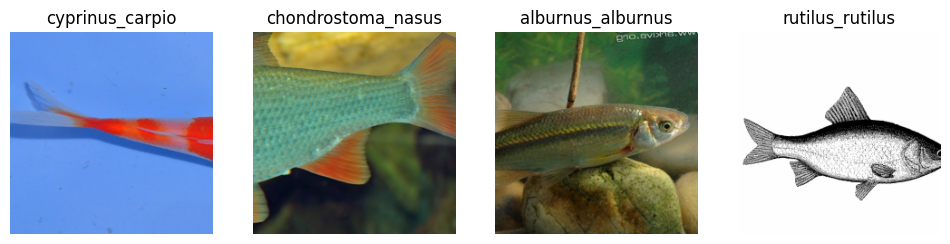

In [ ]:
dls.show_batch(nrows=1, ncols=4)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate).to_fp16()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


SuggestedLRs(valley=0.0012022644514217973)

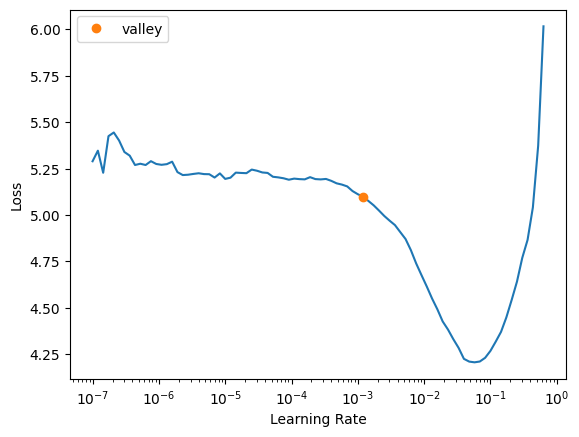

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(5, base_lr=0.0012)

epoch,train_loss,valid_loss,error_rate,time
0,4.168351,2.199399,0.600616,00:19


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,2.603070,1.702528,0.481520,00:18
1,2.034472,1.316837,0.406571,00:19
2,1.546695,1.171699,0.351129,00:19
3,1.243302,1.080003,0.327515,00:19
4,1.043936,1.060729,0.313142,00:19


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=5)

[('carassius_carassius', 'carassius_auratus_gibelio', 11),
 ('rutilus_rutilus', 'scardinius_erythrophthalmus', 7),
 ('scardinius_erythrophthalmus', 'rutilus_rutilus', 7),
 ('carassius_auratus_gibelio', 'carassius_carassius', 6),
 ('leuciscus_idus', 'leuciscus_leuciscus', 6),
 ('blicca_bjoerkna', 'abramis_brama', 5),
 ('chondrostoma_nasus', 'vimba_vimba', 5),
 ('leuciscus_cephalus', 'leuciscus_leuciscus', 5),
 ('leuciscus_leuciscus', 'leuciscus_cephalus', 5)]